In [53]:
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
def show_img(src):
    # opencvの画像はBGR形式なのでRGBへ変換して表示する
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    plt.show()

In [55]:
image_file = 'files/target.jpg'
# 画像の読み込み
src = cv.imread(image_file, cv.IMREAD_COLOR)

# 画素へのアクセス

In [56]:
# 行列の画素値へのアクセス(BGR)
# Numpyの配列で返される
print(src[100, 100])

# Numpy関数を使った各画素へのアクセス
print("B:", src.item(100, 100, 0))
print("G:", src.item(100, 100, 1))
print("R:", src.item(100, 100, 2))

[ 95 100 103]
B: 95
G: 100
R: 103


In [57]:
# 属性情報の取得
# (行数, 列数, チャンネル数)
src.shape

(4032, 3024, 3)

画像の抽出
---

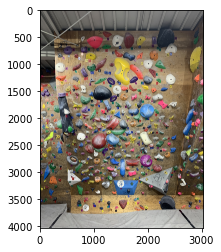

In [58]:
show_img(src)

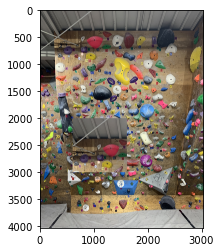

In [64]:
width = 1000
height = 1000
# 行(0~1000), 列(300~1300) を切り取り
hold = src[0:width, 300:300+height]
# 行(2000~3000), 列(600~1600) へ貼り付け
src[2000:2000+width, 600:600+height] = hold
show_img(src)

境界線(ボーダー)
---

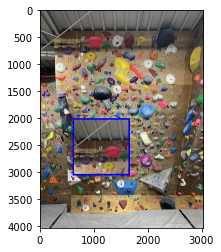

In [76]:
width = 1000
height = 1000
border = 30
# 行(0~1000), 列(300~1300) を切り取り
hold = src[0:width, 300:300+height]
# 塗りつぶしの色(BGR)
BLUE = [255,0,0]
# src, top, bottom, left, right, type, 色
border_hold = cv.copyMakeBorder(hold,border,border,border,border,cv.BORDER_CONSTANT,value=BLUE)
# ボーダー幅を考慮して貼り付け
src[2000:2000+width+(border*2), 600:600+height+(border*2)] = border_hold
show_img(src)

画像のブレンド
---

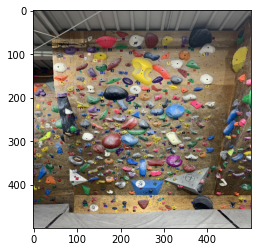

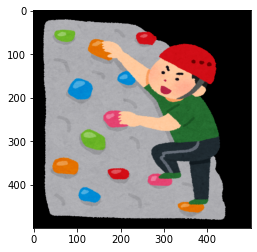

In [92]:
img1 = cv.imread('files/target.jpg')
img2 = cv.imread('files/climbing_man.png')
# 要素数が合っていないとブレンドできないのでリサイズする
img1 = cv.resize(img1, (500, 500))
img2 = cv.resize(img2, (500, 500))
show_img(img1)
show_img(img2)

In [93]:
# img1が0.7, img2が0.3の比率で重ねる
dst = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

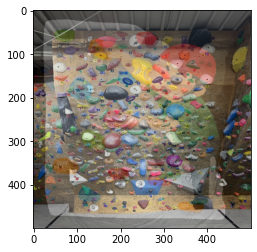

In [94]:
show_img(dst)

### 上から重ねる

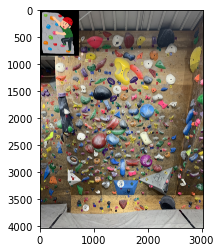

In [97]:
img1 = cv.imread('files/target.jpg')
img2 = cv.imread('files/climbing_man.png')

rows, cols, channels = img2.shape

img1[0:rows, 0:cols] = img2
show_img(img1)

ビット単位で切り抜いて重ねる
---

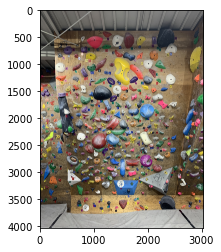

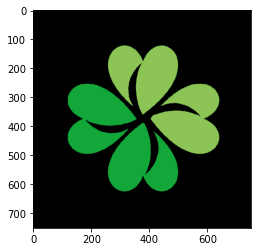

In [122]:
img = cv.imread('files/target.jpg')
logo = cv.imread('files/logo.png')
show_img(img)
show_img(logo)

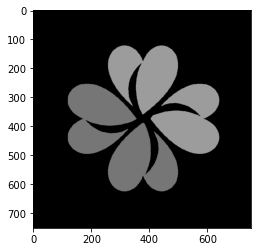

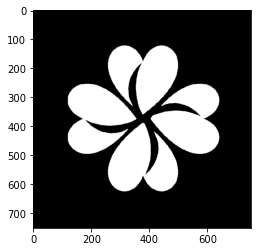

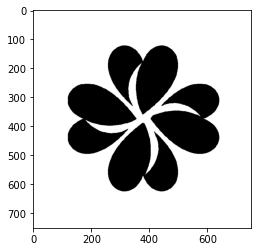

In [124]:
# 2値化してマスクを生成する
gray = cv.cvtColor(logo, cv.COLOR_RGB2GRAY)
show_img(gray)
# 白:黒でフィルタ
ret, mask = cv.threshold(gray, 10, 255, cv.THRESH_BINARY)
show_img(mask)
# 反転したマスク
mask_inv = cv.bitwise_not(mask)
show_img(mask_inv)

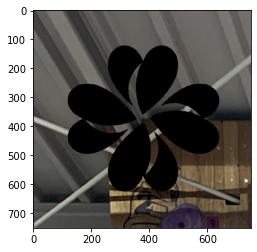

In [127]:
rows, cols, channels = logo.shape
# ロゴのサイズの背景を切り取り
roi = img[0:rows, 0:cols]
# ロゴ部分が黒(0)のマスクとブレンドする
bg = cv.bitwise_and(roi, roi, mask= mask_inv)
show_img(bg)

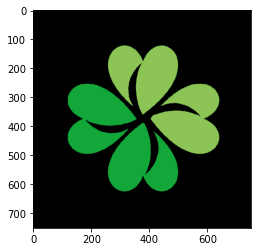

In [128]:
# ロゴ画像をロゴ部分以外を黒(0)になるようにブレンドする
bg2 = cv.bitwise_and(logo, logo, mask=mask)
show_img(bg2)

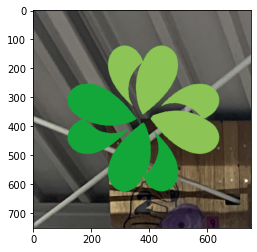

In [129]:
# ブレンドしたもの同士を更にブレンドする
dst = cv.add(bg, bg2)
show_img(dst)

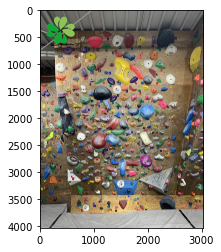

In [130]:
# 最後に背景画像に置換する
img[0:rows, 0:cols] = dst
show_img(img)